In [ ]:
#pip install geopandas

In [2]:
# Import libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [8]:
os.chdir('D:\MDA\Course\Boot Camp\SCMA 632\Assignments\A5')

In [14]:
bhr = pd.read_csv('BHR.csv')

In [15]:
# Print dataset information
print("Dataset Information:")
print(bhr.columns.tolist())
print(bhr.head())
print(bhr.shape)

Dataset Information:
['Unnamed: 0', 'slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number', 'Sample', 'Sector', 'state', 'State_Region', 'District', 'Stratum_Number', 'Sub_Stratum', 'Schedule_type', 'Sub_Round', 'Sub_Sample', 'FOD_Sub_Region', 'Hamlet_Group_Sub_Block', 't', 'X_Stage_Stratum', 'HHS_No', 'Level', 'Filler', 'hhdsz', 'NIC_2008', 'NCO_2004', 'HH_type', 'Religion', 'Social_Group', 'Whether_owns_any_land', 'Type_of_land_owned', 'Land_Owned', 'Land_Leased_in', 'Otherwise_possessed', 'Land_Leased_out', 'Land_Total_possessed', 'During_July_June_Cultivated', 'During_July_June_Irrigated', 'NSS', 'NSC', 'MLT', 'land_tt', 'Cooking_code', 'Lighting_code', 'Dwelling_unit_code', 'Regular_salary_earner', 'Perform_Ceremony', 'Meals_seved_to_non_hhld_members', 'Possess_ration_card', 'Type_of_ration_card', 'MPCE_URP', 'MPCE_MRP', 'Person_Srl_No', 'Relation', 'Sex', 'Age', 'Marital_Status', 'Education', 'Days_Stayed_away', 'No_of_Meals_per_day', 'Meals_School', 'Meals_Emplo

In [23]:
# Subset data (similar columns assumed)
bhrnew = bhr[["state_1", "District", "Region", "Sector", "State_Region",
               "fv_tot", "nonvegtotal_q", "fruitstt_q", "sugartotal_q",
               "spicetot_q", "teatotal_q", "Beveragestotal_q", "pulsestt_q"]]

In [24]:
# Check for missing values
print("Missing Values in Subset:")
print(bhrnew.isna().sum())

Missing Values in Subset:
state_1             0
District            0
Region              0
Sector              0
State_Region        0
fv_tot              0
nonvegtotal_q       0
fruitstt_q          0
sugartotal_q        0
spicetot_q          0
teatotal_q          0
Beveragestotal_q    0
pulsestt_q          0
dtype: int64


In [25]:
# Calculate total consumption
bhrnew["total_consumption"] = bhr_new[["fv_tot", "nonvegtotal_q", "fruitstt_q", 
                                       "sugartotal_q", "spicetot_q", "teatotal_q", 
                                       "Beveragestotal_q", "pulsestt_q"]].fillna(0).sum(axis=1)

C:\Users\vijay\AppData\Local\Temp\ipykernel_20644\3723366574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bhrnew["total_consumption"] = bhr_new[["fv_tot", "nonvegtotal_q", "fruitstt_q",


In [26]:
bhrnew

,state_1,District,Region,Sector,State_Region,fv_tot,nonvegtotal_q,fruitstt_q,sugartotal_q,spicetot_q,teatotal_q,Beveragestotal_q,pulsestt_q,total_consumption
0,Bhr,28,2,2,102,403.533333,0,0,1.833333,0.000433,0,0.0,1.500000,406.867100
1,Bhr,28,2,2,102,184.050000,0,0,1.166667,0.000300,0,0.0,0.833333,186.050300
2,Bhr,28,2,2,102,80.605714,0,0,0.857143,0.000336,0,0.0,1.107143,82.570336
3,Bhr,28,2,2,102,91.600000,0,0,0.700000,0.000261,0,0.0,0.900000,93.200261
4,Bhr,28,2,2,102,102.660000,0,0,0.800000,0.000350,0,0.0,1.100000,104.560350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4577,Bhr,17,1,1,101,102.500000,0,0,0.750000,0.000275,0,0.0,1.250000,104.500275
4578,Bhr,17,1,1,101,120.000000,0,0,0.666667,0.000217,0,0.0,0.666667,121.333550
4579,Bhr,17,1,1,101,138.514286,0,0,1.000000,0.000150,0,0.0,1.357143,140.871579
4580,Bhr,17,1,1,101,98.006667,0,0,0.916667,0.000237,0,0.0,1.166667,100.090237


In [27]:
# Summarize top consuming districts
def summarize_consumption(group_col):
  summary = bhr_new.groupby(group_col)["total_consumption"].sum().sort_values(ascending=False)
  return summary

district_summary = summarize_consumption("District")
print(district_summary)

District
28    22778.328652
14    15737.437876
17    15300.851899
19    14779.759224
35    14594.297031
20    14472.832513
5     14264.543168
13    13789.311632
22    13628.208881
27    12655.916543
2     12614.908954
10    12293.955709
37    11813.186618
12    11771.061405
1     11421.771036
18    11137.361556
4     10949.762318
25     9992.335399
9      9734.659051
3      9704.821701
7      9562.757264
21     9529.308545
29     9464.251275
33     9395.775659
36     9302.836107
23     9254.852365
15     9175.759582
31     9023.574837
24     8786.305420
34     8676.531259
26     8437.261666
32     8276.942735
11     8041.866088
30     7985.529852
16     7859.479635
6      7837.993419
8      7077.756008
38     5714.479355
Name: total_consumption, dtype: float64


In [28]:
# District and Sector mappings
district_mapping = {
    "1": "Pashchim Champaran", "2": "Purba Champaran",
    "3": "Sheohar", "4": "Sitamarhi",
    "5": "Madhubani", "6": "Supaul", "7": "Araria", "8": "Kishanganj", "9": "Purnia",
    "10": "Katihar", "11": "Madhepura", "12": "Saharsa", "13": "Darbhanga",
    "14": "Muzaffarpur", "15": "Gopalganj", "16": "Siwan", "17": "Saran",
    "18": "Vaishali", "19": "Samastipur", "20": "Begusarai",
    "21": "Khagaria", "22": "Bhagalpur", "23": "Banka", "24": "Munger",
    "25": "Lakhisarai", "26": "Sheikhpura", "27": "Nalanda", "28": "Patna",
    "29": "Bhojpur", "30": "Buxar", "31": "Kaimur", "32": "Rohtas",
    "33": "Jehanabad", "34": "Aurangabad", "35": "Gaya", "36": "Nawada",
    "37": "Jamui", "38": "Arwal"
}

sector_mapping = {
    "2": "URBAN", "1": "RURAL"
}

# Convert columns to strings
bhrnew['District'] = bhrnew['District'].astype(str)
bhrnew['Sector'] = bhrnew['Sector'].astype(str)

# Map district and sector values
bhrnew['District'] = bhrnew['District'].map(district_mapping).fillna(bhrnew['District'])
bhrnew['Sector'] = bhrnew['Sector'].map(sector_mapping).fillna(bhrnew['Sector'])

# Display the updated DataFrame
print(bhrnew)


     state_1 District  Region Sector  State_Region      fv_tot  nonvegtotal_q  \
0        Bhr    Patna       2  URBAN           102  403.533333              0   
1        Bhr    Patna       2  URBAN           102  184.050000              0   
2        Bhr    Patna       2  URBAN           102   80.605714              0   
3        Bhr    Patna       2  URBAN           102   91.600000              0   
4        Bhr    Patna       2  URBAN           102  102.660000              0   
...      ...      ...     ...    ...           ...         ...            ...   
4577     Bhr    Saran       1  RURAL           101  102.500000              0   
4578     Bhr    Saran       1  RURAL           101  120.000000              0   
4579     Bhr    Saran       1  RURAL           101  138.514286              0   
4580     Bhr    Saran       1  RURAL           101   98.006667              0   
4581     Bhr    Saran       1  RURAL           101   70.366667              0   

      fruitstt_q  sugartota

C:\Users\vijay\AppData\Local\Temp\ipykernel_20644\272401809.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bhrnew['District'] = bhrnew['District'].astype(str)
C:\Users\vijay\AppData\Local\Temp\ipykernel_20644\272401809.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bhrnew['Sector'] = bhrnew['Sector'].astype(str)
C:\Users\vijay\AppData\Local\Temp\ipykernel_20644\272401809.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [32]:
bhrnew.District.unique()

array(['Patna', 'Nawada', 'Kaimur', 'Rohtas', 'Gaya', 'Buxar',
       'Aurangabad', 'Jehanabad', 'Bhojpur', 'Jamui', 'Sheikhpura',
       'Bhagalpur', 'Lakhisarai', 'Munger', 'Banka', 'Nalanda',
       'Darbhanga', 'Kishanganj', 'Purnia', 'Saharsa', 'Araria',
       'Madhepura', 'Katihar', 'Supaul', 'Muzaffarpur', 'Madhubani',
       'Vaishali', 'Samastipur', 'Saran', 'Khagaria', 'Begusarai',
       'Siwan', 'Gopalganj', 'Sheohar', 'Purba Champaran',
       'Pashchim Champaran', 'Sitamarhi', 'Arwal'], dtype=object)

In [33]:
# Aggregate total_consumption by District
bhr_consumption = bhrnew.groupby('District', as_index=False)['total_consumption'].sum()

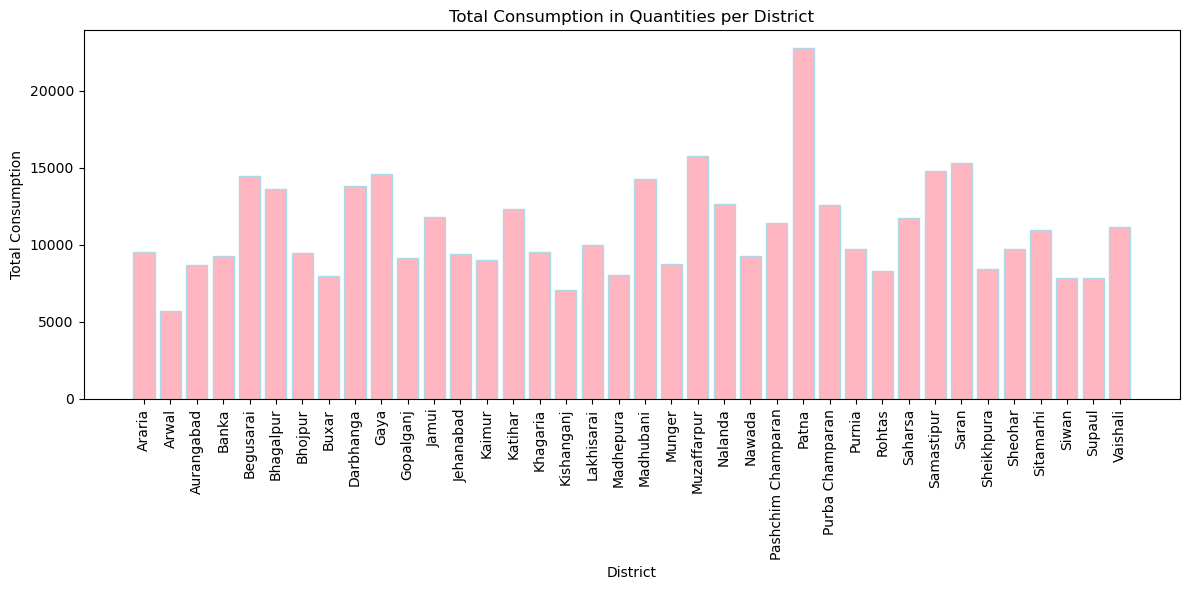

In [34]:
# Bar plot for total consumption per district
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(bhr_consumption["District"], bhr_consumption["total_consumption"], color='lightpink', edgecolor='lightblue')
plt.xticks(rotation=90)  # Rotate district names for better readability
plt.xlabel("District")
plt.ylabel("Total Consumption")
plt.title("Total Consumption in Quantities per District")
plt.tight_layout()
plt.show()

In [36]:
os.environ['SHAPE_RESTORE_SHX'] = 'YES'

In [45]:
data_map = gpd.read_file('BIHAR_DISTRICTS.geojson')

In [46]:
data_map

,dtname,stname,stcode11,dtcode11,year_stat,Shape_Length,Shape_Area,OBJECTID,test,Dist_LGD,State_LGD,geometry
0,Pashchim Champaran,BIHAR,10,203,2011_c,545933.789936,6.627886e+09,256,0,211,10,"POLYGON ((84.10851 27.52135, 84.10796 27.52163..."
1,Purba Champaran,BIHAR,10,204,2011_c,539281.150145,4.986852e+09,282,0,213,10,"POLYGON ((84.82324 27.02095, 84.82192 27.02121..."
2,Sitamarhi,BIHAR,10,206,2011_c,434022.611113,2.752071e+09,302,1,221,10,"POLYGON ((85.63519 26.87238, 85.6241 26.87368,..."
3,Sheohar,BIHAR,10,205,2011_c,195084.909150,5.539639e+08,304,0,220,10,"POLYGON ((85.31727 26.66152, 85.3165 26.66167,..."
4,Gopalganj,BIHAR,10,217,2011_c,397275.862028,2.554057e+09,307,0,197,10,"POLYGON ((84.42889 26.63644, 84.42379 26.63671..."
5,Samastipur,BIHAR,10,221,2011_c,509972.370921,3.327008e+09,326,0,217,10,"POLYGON ((85.71492 26.08861, 85.71371 26.08943..."
6,Katihar,BIHAR,10,212,2011_c,539345.307629,3.747668e+09,333,1,201,10,"POLYGON ((87.82502 25.88159, 87.82481 25.88164..."
7,Khagaria,BIHAR,10,223,2011_c,330419.992502,1.840770e+09,343,1,202,10,"POLYGON ((86.41309 25.73127, 86.41104 25.73179..."
8,Bhojpur,BIHAR,10,231,2011_c,331452.360261,2.988175e+09,344,0,193,10,"POLYGON ((84.38542 25.74655, 84.38501 25.7469,..."
9,Buxar,BIHAR,10,232,2011_c,285673.941705,2.052515e+09,346,0,194,10,"POLYGON ((84.13986 25.73172, 84.13983 25.73175..."


In [47]:
data_map = data_map.rename(columns={'dtname': 'District'})

In [48]:
data_map

,District,stname,stcode11,dtcode11,year_stat,Shape_Length,Shape_Area,OBJECTID,test,Dist_LGD,State_LGD,geometry
0,Pashchim Champaran,BIHAR,10,203,2011_c,545933.789936,6.627886e+09,256,0,211,10,"POLYGON ((84.10851 27.52135, 84.10796 27.52163..."
1,Purba Champaran,BIHAR,10,204,2011_c,539281.150145,4.986852e+09,282,0,213,10,"POLYGON ((84.82324 27.02095, 84.82192 27.02121..."
2,Sitamarhi,BIHAR,10,206,2011_c,434022.611113,2.752071e+09,302,1,221,10,"POLYGON ((85.63519 26.87238, 85.6241 26.87368,..."
3,Sheohar,BIHAR,10,205,2011_c,195084.909150,5.539639e+08,304,0,220,10,"POLYGON ((85.31727 26.66152, 85.3165 26.66167,..."
4,Gopalganj,BIHAR,10,217,2011_c,397275.862028,2.554057e+09,307,0,197,10,"POLYGON ((84.42889 26.63644, 84.42379 26.63671..."
5,Samastipur,BIHAR,10,221,2011_c,509972.370921,3.327008e+09,326,0,217,10,"POLYGON ((85.71492 26.08861, 85.71371 26.08943..."
6,Katihar,BIHAR,10,212,2011_c,539345.307629,3.747668e+09,333,1,201,10,"POLYGON ((87.82502 25.88159, 87.82481 25.88164..."
7,Khagaria,BIHAR,10,223,2011_c,330419.992502,1.840770e+09,343,1,202,10,"POLYGON ((86.41309 25.73127, 86.41104 25.73179..."
8,Bhojpur,BIHAR,10,231,2011_c,331452.360261,2.988175e+09,344,0,193,10,"POLYGON ((84.38542 25.74655, 84.38501 25.7469,..."
9,Buxar,BIHAR,10,232,2011_c,285673.941705,2.052515e+09,346,0,194,10,"POLYGON ((84.13986 25.73172, 84.13983 25.73175..."


<Axes: >

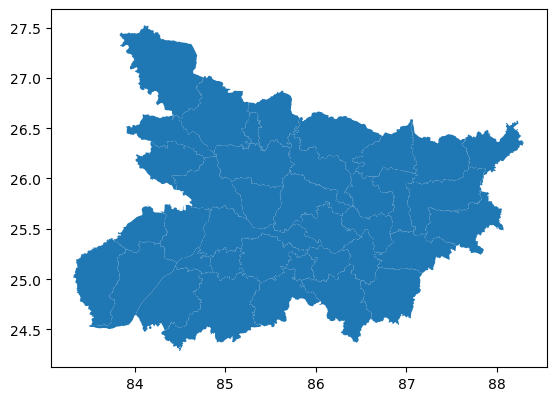

In [49]:
data_map.plot()

In [50]:
data_map_data = pd.merge(bhr_consumption, data_map, on='District')

In [51]:
data_map_data

,District,total_consumption,stname,stcode11,dtcode11,year_stat,Shape_Length,Shape_Area,OBJECTID,test,Dist_LGD,State_LGD,geometry
0,Araria,9562.757264,BIHAR,10,209,2011_c,437248.757398,3.490874e+09,523,1,188,10,"POLYGON ((87.07075 26.58652, 87.06047 26.58697..."
1,Arwal,5714.479355,BIHAR,10,240,2011_c,210246.950056,7.838096e+08,515,0,611,10,"POLYGON ((84.70506 25.31004, 84.70207 25.31495..."
2,Aurangabad,8676.531259,BIHAR,10,235,2011_c,415670.824147,4.025154e+09,698,1,189,10,"POLYGON ((84.47158 25.09029, 84.47112 25.09139..."
3,Banka,9254.852365,BIHAR,10,225,2011_c,387393.235324,3.697942e+09,373,1,190,10,"POLYGON ((86.73003 25.12174, 86.7285 25.12186,..."
4,Begusarai,14472.832513,BIHAR,10,222,2011_c,407076.585410,2.368298e+09,511,1,191,10,"POLYGON ((86.11569 25.77569, 86.11132 25.77664..."
5,Bhagalpur,13628.208881,BIHAR,10,224,2011_c,438021.383215,3.137049e+09,512,0,192,10,"POLYGON ((87.09819 25.51558, 87.09776 25.51596..."
6,Bhojpur,9464.251275,BIHAR,10,231,2011_c,331452.360261,2.988175e+09,344,0,193,10,"POLYGON ((84.38542 25.74655, 84.38501 25.7469,..."
7,Buxar,7985.529852,BIHAR,10,232,2011_c,285673.941705,2.052515e+09,346,0,194,10,"POLYGON ((84.13986 25.73172, 84.13983 25.73175..."
8,Darbhanga,13789.311632,BIHAR,10,215,2011_c,538304.354347,3.122478e+09,351,0,195,10,"POLYGON ((85.72245 26.44641, 85.72213 26.44646..."
9,Gaya,14594.297031,BIHAR,10,236,2011_c,689330.169531,6.046024e+09,379,1,196,10,"POLYGON ((85.18322 25.07294, 85.18284 25.07297..."


In [56]:
bhr_data = data_map_data[['District', 'total_consumption']]

In [57]:
bhr_data

,District,total_consumption
0,Araria,9562.757264
1,Arwal,5714.479355
2,Aurangabad,8676.531259
3,Banka,9254.852365
4,Begusarai,14472.832513
5,Bhagalpur,13628.208881
6,Bhojpur,9464.251275
7,Buxar,7985.529852
8,Darbhanga,13789.311632
9,Gaya,14594.297031


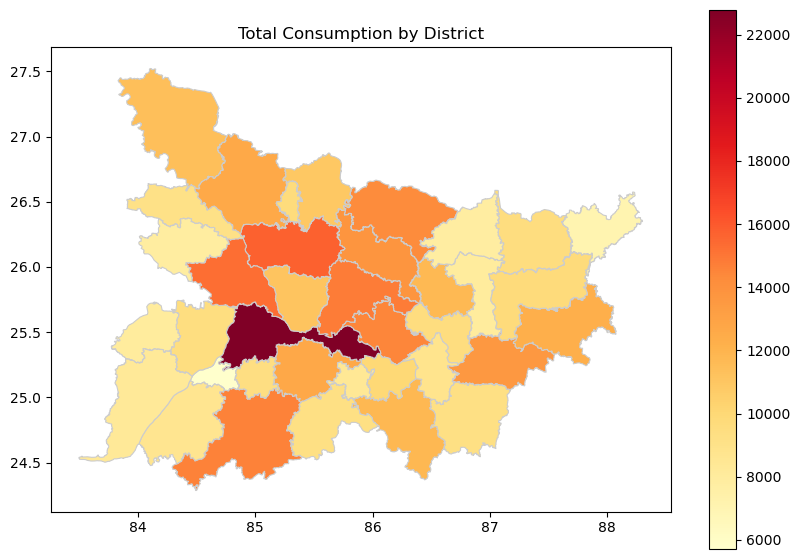

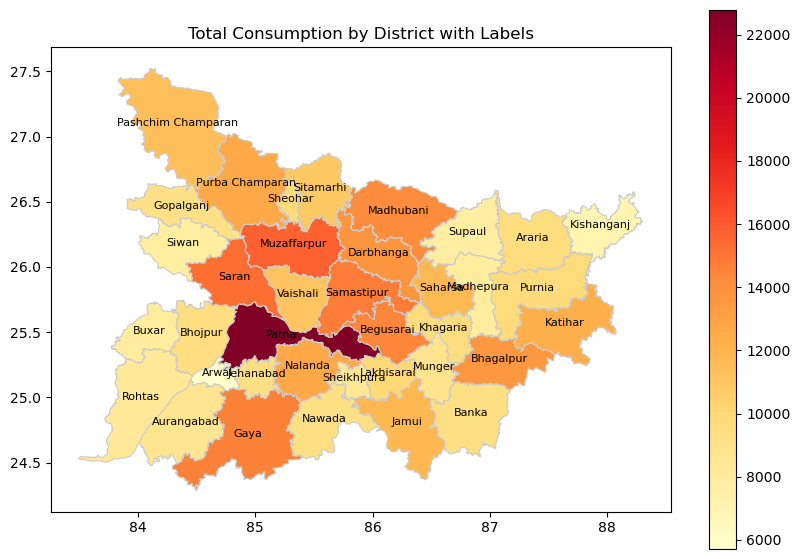

In [69]:
# Create GeoDataFrame
data_map_data = gpd.GeoDataFrame(data_map_data, crs="EPSG:4326")

# First plot with color bar
fig1, ax1 = plt.subplots(1, 1, figsize=(10, 7))
cmap = 'YlOrRd'
data_map_data.plot(column='total_consumption', cmap=cmap, linewidth=0.8, ax=ax1, edgecolor='0.8', legend=True)
ax1.set_title("Total Consumption by District")
plt.show()

# Second plot with color bar and labels
fig2, ax2 = plt.subplots(1, 1, figsize=(10, 7))
data_map_data.plot(column='total_consumption', cmap=cmap, linewidth=0.8, ax=ax2, edgecolor='0.8', legend=True)
data_map_data.apply(lambda x: ax2.annotate(text=x['District'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=8), axis=1)
ax2.set_title("Total Consumption by District with Labels")
plt.show()